In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import spatial_maps as sm

from tqdm import tqdm
from models import FFGC
from plotting_functions import *

import scipy

In [2]:
## Training parameters
train_steps = 10000
bs = 128 # batch size

In [3]:
# instantiate feedforward model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
alphas = np.linspace(0.8, 0.9, 41)
# alphas = 1-np.geomspace(0.001,1,30)
grid_scores = []
for alpha in tqdm(alphas):
    print(f'Alpha: {alpha}')
    model = FFGC(alpha = alpha)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
    # Train model
    for i in range(train_steps-len(model.total_loss_history)):
        r = torch.rand((bs, 2), device = device)*4*np.pi - 2*np.pi
        loss = model.train_step(inputs = r, labels = r, optimizer = optimizer)

    # Plot loss history
    # fig,axs = plt.subplots(1,3,figsize=(9,3))
    # axs[0].semilogy(np.array(model.total_loss_history)-model.loss_minima(), label = 'Total loss', color = 'black')
    # axs[1].semilogy(np.array(model.capacity_loss_history)-model.loss_minima(), label = 'Capacity loss', color = 'red')
    # axs[2].semilogy(model.similarity_loss_history, label = 'Similarity loss', color = 'blue')
    # fig.tight_layout()
    # fig.legend()
    # plt.savefig(f'./gridsearch/ffgc_loss_alpha_{alpha}.png')
    # plt.close()

    # evaluate on 64x64 grid
    res = 64
    x = np.linspace(-1, 1, res)*2*np.pi
    y = np.linspace(-1, 1, res)*2*np.pi
    xx, yy = np.meshgrid(x,y)
    r = np.stack([xx.ravel(), yy.ravel()], axis = -1)
    gs = model(torch.tensor(r.astype("float32"),device = device))
    gs = gs.detach().cpu().numpy()
    gs = gs.T.reshape(-1,res,res)

    # plot spatial map
    # multiimshow(gs[:25], figsize=(10,10), normalize=False);
    # plt.tight_layout()
    # plt.savefig(f'./gridsearch/ffgc_spatial_map_alpha_{alpha}.png')
    # plt.close()

    # Gridscore
    grid_score = np.array([sm.gridness(gs[i]) for i in range(len(gs))])
    grid_scores.append(grid_score)

# Save grid scores
grid_scores = np.array(grid_scores)
np.save('./gridsearch/ffgc_grid_scores.npy', grid_scores)
np.save('./gridsearch/ffgc_grid_scores_alphas.npy', alphas)

  0%|          | 0/41 [00:00<?, ?it/s]

Alpha: 0.8


c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  2%|▏         | 1/41 [00:17<11:42, 17.57s/it]

Alpha: 0.8025


  5%|▍         | 2/41 [00:34<11:03, 17.01s/it]

Alpha: 0.805


  7%|▋         | 3/41 [00:50<10:39, 16.82s/it]

Alpha: 0.8075


 10%|▉         | 4/41 [01:07<10:19, 16.74s/it]

Alpha: 0.81


c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\spatial_maps\tools.py:41: RuntimeWarning: invalid value encountered in true_divide
  arr1 = (arr1 - np.mean(a_)) / (np.std(a_) * len(a_))
c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\spatial_maps\tools.py:42: RuntimeWarning: invalid value encountered in true_divide
  arr2 = (arr2 - np.mean(v_)) / np.std(v_)
c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\numpy\core\fromnumeric.py:86: UserWarning: Warning: converting a masked element to nan.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 12%|█▏        | 5/41 [01:24<10:01, 16.71s/it]

Alpha: 0.8125


 15%|█▍        | 6/41 [01:40<09:43, 16.67s/it]

Alpha: 0.8150000000000001


 17%|█▋        | 7/41 [01:57<09:26, 16.66s/it]

Alpha: 0.8175


 20%|█▉        | 8/41 [02:14<09:14, 16.81s/it]

Alpha: 0.8200000000000001


 22%|██▏       | 9/41 [02:30<08:53, 16.67s/it]

Alpha: 0.8225


 24%|██▍       | 10/41 [02:47<08:38, 16.73s/it]

Alpha: 0.8250000000000001


 27%|██▋       | 11/41 [03:04<08:21, 16.70s/it]

Alpha: 0.8275


 29%|██▉       | 12/41 [03:20<08:01, 16.59s/it]

Alpha: 0.8300000000000001


 32%|███▏      | 13/41 [03:36<07:41, 16.49s/it]

Alpha: 0.8325


 34%|███▍      | 14/41 [03:53<07:23, 16.44s/it]

Alpha: 0.8350000000000001


 37%|███▋      | 15/41 [04:09<07:06, 16.39s/it]

Alpha: 0.8375


 39%|███▉      | 16/41 [04:25<06:48, 16.34s/it]

Alpha: 0.8400000000000001


 41%|████▏     | 17/41 [04:41<06:31, 16.33s/it]

Alpha: 0.8425


 44%|████▍     | 18/41 [04:58<06:14, 16.29s/it]

Alpha: 0.8450000000000001


 46%|████▋     | 19/41 [05:14<05:58, 16.28s/it]

Alpha: 0.8475


 49%|████▉     | 20/41 [05:30<05:41, 16.27s/it]

Alpha: 0.8500000000000001


 51%|█████     | 21/41 [05:46<05:25, 16.26s/it]

Alpha: 0.8525


 54%|█████▎    | 22/41 [06:03<05:10, 16.34s/it]

Alpha: 0.855


 56%|█████▌    | 23/41 [06:19<04:54, 16.34s/it]

Alpha: 0.8575


 59%|█████▊    | 24/41 [06:36<04:37, 16.34s/it]

Alpha: 0.86


 61%|██████    | 25/41 [06:52<04:21, 16.32s/it]

Alpha: 0.8625


 63%|██████▎   | 26/41 [07:08<04:04, 16.31s/it]

Alpha: 0.865


 66%|██████▌   | 27/41 [07:25<03:50, 16.45s/it]

Alpha: 0.8675


 68%|██████▊   | 28/41 [07:41<03:33, 16.42s/it]

Alpha: 0.87


 71%|███████   | 29/41 [07:58<03:17, 16.42s/it]

Alpha: 0.8725


 73%|███████▎  | 30/41 [08:14<03:00, 16.42s/it]

Alpha: 0.875


 76%|███████▌  | 31/41 [08:31<02:44, 16.47s/it]

Alpha: 0.8775000000000001


 78%|███████▊  | 32/41 [08:47<02:28, 16.54s/it]

Alpha: 0.88


 80%|████████  | 33/41 [09:04<02:12, 16.56s/it]

Alpha: 0.8825000000000001


 83%|████████▎ | 34/41 [09:21<01:56, 16.59s/it]

Alpha: 0.885


 85%|████████▌ | 35/41 [09:37<01:39, 16.62s/it]

Alpha: 0.8875000000000001


 88%|████████▊ | 36/41 [09:54<01:23, 16.63s/it]

Alpha: 0.89


 90%|█████████ | 37/41 [10:11<01:06, 16.65s/it]

Alpha: 0.8925000000000001


 93%|█████████▎| 38/41 [10:29<00:51, 17.16s/it]

Alpha: 0.895


 95%|█████████▌| 39/41 [10:47<00:34, 17.47s/it]

Alpha: 0.8975000000000001


 98%|█████████▊| 40/41 [11:06<00:17, 17.77s/it]

Alpha: 0.9


100%|██████████| 41/41 [11:24<00:00, 16.69s/it]


In [8]:
alphas = np.linspace(0.8, 0.9, 41)
# alphas = 1-np.geomspace(0.001,1,30)
# np.save('./gridsearch/ffgc_grid_scores_30alphasLog_alphas.npy', alphas)

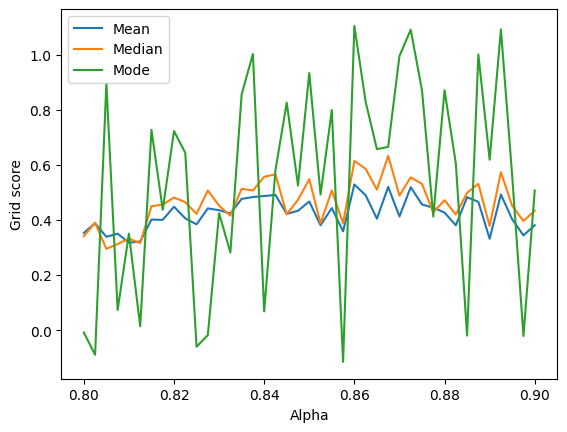

In [9]:
# NaNs to zeors
grid_scores[np.isnan(grid_scores)] = 0
grid_scores_binned = []
gs_modes = np.zeros(len(grid_scores))

gs_means = np.mean(grid_scores, axis = 1)
gs_meadians = np.median(grid_scores, axis = 1)
# mode on 30 bins
for i in range(len(grid_scores)):
    grid_scores_binned.append(np.histogram(grid_scores[i], bins = 100))
    gs_modes[i] = grid_scores_binned[i][1][np.argmax(grid_scores_binned[i][0])]
plt.plot(alphas, gs_means, label = 'Mean')
plt.plot(alphas, gs_meadians, label = 'Median')
plt.plot(alphas, gs_modes, label = 'Mode')
plt.xlabel('Alpha')
plt.ylabel('Grid score')
plt.legend()
# plt.savefig('./gridsearch/ffgc_grid_scores.png')
plt.show()

In [10]:
mode_max = alphas[np.argmax(gs_modes)]
mean_max = alphas[np.argmax(gs_means)]
median_max = alphas[np.argmax(gs_meadians)]
print(f'Mode max: {mode_max}')
print(f'Mean max: {mean_max}')
print(f'Median max: {median_max}')

Mode max: 0.86
Mean max: 0.86
Median max: 0.8675


C:\Users\kingt\AppData\Local\Temp\ipykernel_13944\798073310.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, x/(1-x), label = 'x/(1-x)')


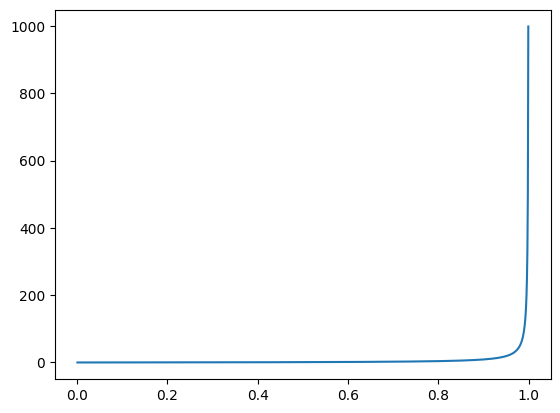

In [55]:
x = np.linspace(0.001,1,1000)
plt.plot(x, x/(1-x), label = 'x/(1-x)')

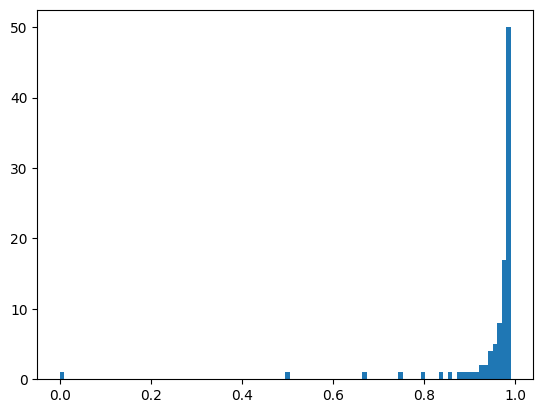

In [107]:
y = np.linspace(0.0001,100,100)
alphas = 1/(1/(y) + 1)
plt.hist(alphas, bins = 100)
plt.show()

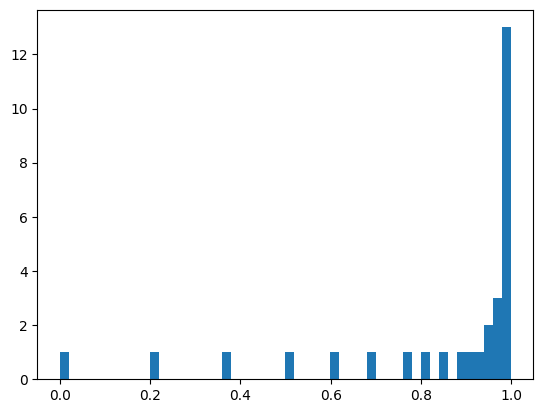

In [6]:
alphas = 1-np.geomspace(0.001,1,30)
plt.hist(alphas, bins = 50)
plt.show()

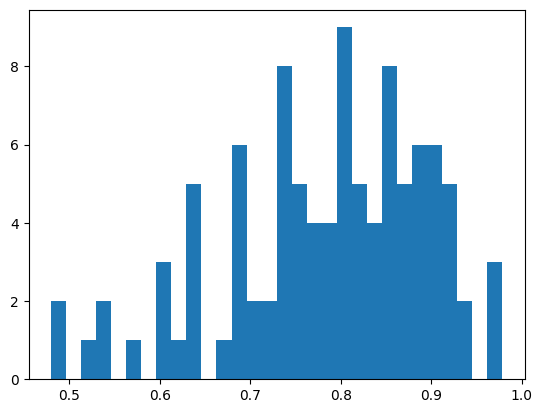

In [246]:
alphas = np.random.beta(10,3,100)
plt.hist(alphas, bins = 30)
plt.show()